필요한 라이브러리 import

In [1]:
from keras import models, layers
import cv2
from glob import glob
import os
import numpy as np
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
import tensorflow as tf
import Augmentor
import random
from PIL import Image
import PIL.ImageOps 
from IPython.display import Image
import time
import pandas as pd
import random

from keras import regularizers
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint,EarlyStopping
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.
C:\Users\Master\anaconda3\envs\sw2\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Master\anaconda3\envs\sw2\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Master\anaconda3\envs\sw2\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Master\anaconda3\envs\sw2\lib\site-packag

데이터 증강 

In [ ]:
num_augmented_images = 100
file_path = 'C:\\Users\\Master\\Desktop\\test2\\'
file_names = os.listdir(file_path)
total_origin_image_num = len(file_names)
augment_cnt = 1

In [ ]:
for i in range(1, num_augmented_images):
    try:
        change_picture_index = random.randrange(1, total_origin_image_num-1)
        print(change_picture_index)
        print(file_names[change_picture_index])
        file_name = file_names[change_picture_index]

        origin_image_path = 'C:\\Users\\Master\\Desktop\\test2\\' + file_name
        print(origin_image_path)
        image = Image.open(origin_image_path)
        random_augment = random.randrange(1,4)

        if(random_augment == 1):
            print("invert")
            inverted_image = image.transpose(Image.FLIP_LEFT_RIGHT)
            inverted_image.save(file_path + 'inverted_' + str(augment_cnt) + '.jpg')

        elif(random_augment == 2):
            print("rotate")
            rotated_image = image.rotate(random.randrange(-20, 20))
            rotated_image.save(file_path + 'rotated_' + str(augment_cnt) + '.jpg')

        elif(random_augment == 3):
            img = cv2.imread(origin_image_path)
            print("noise")
            row,col,ch= img.shape
            mean = 0
            var = 0.1
            sigma = var**0.5
            gauss = np.random.normal(mean,sigma,(row,col,ch))
            gauss = gauss.reshape(row,col,ch)
            noisy_array = img + gauss
            noisy_image = Image.fromarray(np.uint8(noisy_array)).convert('RGB')
            noisy_image.save(file_path + 'noiseAdded_' + str(augment_cnt) + '.jpg')

        augment_cnt += 1
    except:
        pass

사용할 포켓몬 폴더의 모든 이름을 변경

In [ ]:
image_list = os.listdir('C:\\Users\\Master\\Desktop\\datasetcp\\')
print(image_list)
len_image = len(image_list)


for i in image_list:
    file_path_i = 'C:\\Users\\Master\\Desktop\\datasetcp' + '/' + i + '/' 
    file_name_i = os.listdir(file_path_i)
    j = 1
    for name in file_name_i:
        src = os.path.join(file_path_i, name)
        dst = i + '.' + str(j) + '.jpg'
        dst = os.path.join(file_path_i, dst)
        os.rename(src, dst) 
        j+=1

이미지 불러오기

In [2]:
all_images = glob('C:\\Users\\Master\\Desktop\\pr1\\pocket_classifi2\\*.jpg')  
pocket_class = ['Pikachu', 'Bulbasaur', 'Psyduck', 'Clefairy', 'Gastly', 'Growlithe', 'Jigglypuff', 'Mew', 'Poliwag', 'Slowpoke']

In [3]:
print('전체 이미지 수:', len(all_images))
all_images[:5]

전체 이미지 수: 40483


['C:\\Users\\Master\\Desktop\\pr1\\pocket_classifi2\\Bulbasaur.1.jpg',
 'C:\\Users\\Master\\Desktop\\pr1\\pocket_classifi2\\Bulbasaur.10.jpg',
 'C:\\Users\\Master\\Desktop\\pr1\\pocket_classifi2\\Bulbasaur.100.jpg',
 'C:\\Users\\Master\\Desktop\\pr1\\pocket_classifi2\\Bulbasaur.1000.jpg',
 'C:\\Users\\Master\\Desktop\\pr1\\pocket_classifi2\\Bulbasaur.1001.jpg']

이미지와 레이블을 저장

In [4]:
X = list()       
Y = list()   
dic_label = {'Pikachu':0, 'Bulbasaur':1, 'Psyduck':2, "Clefairy":3, "Gastly":4, 'Growlithe':5, 'Jigglypuff':6, 'Mew':7, 'Poliwag':8, 'Slowpoke':9}    

start = time.time()
for picname in all_images:       
    try:                          
        pic = cv2.imread(picname) 
        pic = cv2.resize(pic, dsize=(56, 56))
        pic = cv2.cvtColor(pic, cv2.COLOR_BGR2RGB)
    
        pic = np.array(pic)
        X.append(pic)         
    
        label = picname.split('\\') 
        label = label[6] 
        label = label.split('.')
        label = str(label[0])   
        label = dic_label[label]       
        Y.append(label)  
    except :   
        pass

X = np.array(X)   
Y = np.array(Y)
print('X shape:', X.shape)
print('Y shape:', Y.shape)
print('경과시간: {} 초'.format(int(time.time() - start)))

X shape: (39875, 56, 56, 3)
Y shape: (39875,)
경과시간: 200 초


훈련데이터와 테스트데이터 8:2로 나눔

In [5]:
train_pics, test_pics, train_labels, test_labels = train_test_split(X, Y, test_size = 0.2, shuffle=True, random_state=44)
print('훈련 사진 shape:', train_pics.shape)
print('테스트 사진 shape:', test_pics.shape)
print('훈련 라벨 shape', train_labels.shape)
print('테스트 라벨 shape', test_labels.shape)

훈련 사진 shape: (31900, 56, 56, 3)
테스트 사진 shape: (7975, 56, 56, 3)
훈련 라벨 shape (31900,)
테스트 라벨 shape (7975,)


훈련이미지와 테스트이미지 전처리

In [6]:
L, W, H, C = train_pics.shape         
train_pics = train_pics.reshape(-1, W * H * C)   
test_pics = test_pics.reshape(-1, W * H * C)  
train_pics = train_pics.astype('float') / 255  
test_pics = test_pics.astype('float') / 255 
print(train_pics[:5])
print(test_pics[:5])

[[0.         0.         0.         ... 0.         0.         0.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.99607843 0.99607843 0.99607843 ... 0.91764706 0.91764706 0.91764706]
 [0.         0.         0.         ... 0.         0.         0.        ]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.00392157 0.00392157 0.00392157 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


훈련라벨과 테스트라벨 0~9사이로 원핫인코딩

In [7]:
Train_labels = to_categorical(train_labels, 10)      
Test_labels = to_categorical(test_labels, 10)         
print('훈련 라벨 shape:', train_labels.shape)
print('테스트 라벨 shape', test_labels.shape)

훈련 라벨 shape: (31900,)
테스트 라벨 shape (7975,)


모델생성 및 설정

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               4817408   
_________________________________________________________________
dense_5 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                2570      
Total params: 4,951,306
Trainable params: 4,951,306
Non-trainable params: 0
_________________________________________________________________


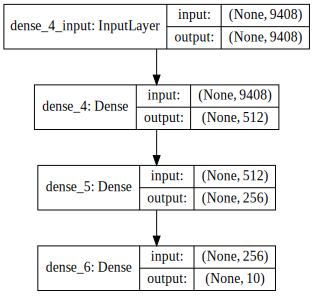

In [17]:

model = Sequential()                 
model.add(Dense(512, activation = 'relu',      
            input_shape=(9408,), 
             # kernel_regularizer = regularizers.l2(0.01),
            ))
# model.add(layers.BatchNormalization())
model.add(Dense(256, activation = 'relu',
            # kernel_regularizer = regularizers.l2(0.0001)
            ))        
# model.add(Dropout(0.25))
# model.add(layers.BatchNormalization())
             
model.add(Dense(10, activation = 'softmax')) 
model.summary()

%matplotlib inline       

SVG(model_to_dot(model, show_shapes=True, dpi=70).create(prog='dot', format='svg'))   

모델적용 및 훈련

In [18]:
MODEL_DIR = './model/'             
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)  
early_stopping = EarlyStopping(monitor = 'val_loss', patience=10, verbose=1, mode = 'auto')  

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy']) 
history = model.fit(train_pics, Train_labels, batch_size=128, epochs=40, verbose=1, validation_data=(test_pics, Test_labels),
callbacks = [early_stopping, checkpointer]) 

Train on 31900 samples, validate on 7975 samples
Epoch 1/40
31900/31900 [==============================] - 13s 418us/step - loss: 2.4277 - accuracy: 0.3005 - val_loss: 1.4857 - val_accuracy: 0.4789

Epoch 00001: val_loss improved from inf to 1.48569, saving model to ./model/01-1.4857.hdf5
Epoch 2/40
31900/31900 [==============================] - 14s 427us/step - loss: 1.3101 - accuracy: 0.5400 - val_loss: 1.1779 - val_accuracy: 0.5832

Epoch 00002: val_loss improved from 1.48569 to 1.17787, saving model to ./model/02-1.1779.hdf5
Epoch 3/40
31900/31900 [==============================] - 14s 430us/step - loss: 1.0316 - accuracy: 0.6453 - val_loss: 1.0846 - val_accuracy: 0.6157

Epoch 00003: val_loss improved from 1.17787 to 1.08455, saving model to ./model/03-1.0846.hdf5
Epoch 4/40
31900/31900 [==============================] - 14s 429us/step - loss: 0.8810 - accuracy: 0.6999 - val_loss: 0.9385 - val_accuracy: 0.6898

Epoch 00004: val_loss improved from 1.08455 to 0.93853, saving model t

훈련된 모델에 테스트데이터를 이용하여 평가
conda install 'h5py==2.10.0' --force-reinstall 

In [10]:
model_best = models.load_model('./model/40-0.1619.hdf5')  
score = model_best.evaluate(test_pics, Test_labels) 
print('Test loss:', score[0])
print('Test accuracy:', score[1])

7975/7975 [==============================] - 1s 101us/step
Test loss: 0.16190711639987942
Test accuracy: 0.9672726988792419


예측값, 예측에 맞은값, 예측에 틀린값 구하는 거

In [11]:
predict_classes = np.argmax(model_best.predict(test_pics), axis = 1)
correct_indices = np.nonzero(predict_classes == test_labels)[0]
incorrect_indices = np.nonzero(predict_classes != test_labels)[0]
print('총 예측한 데이터 수: ', predict_classes.shape)
print('예측에 성공한 데이터 수: ', correct_indices.shape)
print('예측에 실패한 데이터 수: ', incorrect_indices.shape)

총 예측한 데이터 수:  (7975,)
예측에 성공한 데이터 수:  (7714,)
예측에 실패한 데이터 수:  (261,)


예측한 값이랑 실제값이 같은 것을 보여줌

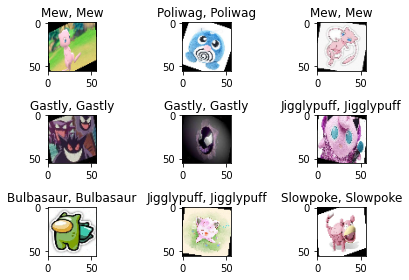

In [12]:
dic_title = {0:'Pikachu', 1:'Bulbasaur', 2:'Psyduck', 3:'Clefairy', 4:'Gastly', 5:'Growlithe', 6:'Jigglypuff', 7:'Mew', 8:'Poliwag', 9:'Slowpoke'}

plt.figure()
for i in range(9):
    plt.subplot(3, 3, i+1)
    correct = correct_indices[i]
    pred_1 = predict_classes[correct]
    cla_1 = test_labels[correct]
    plt.imshow(test_pics[correct].reshape(56, 56, 3))
    plt.title('{}, {}'.format(dic_title[pred_1], dic_title[cla_1]))
plt.tight_layout()

예측값과 실제값이 다른 것을 보여줌

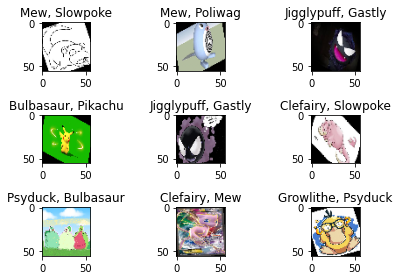

In [13]:
plt.figure()
for i in range(9):
    plt.subplot(3, 3, i+1)
    incorrect = incorrect_indices[i]
    pred_2 = predict_classes[incorrect]
    cla_2 = test_labels[incorrect]
    plt.imshow(test_pics[incorrect].reshape(56, 56, 3))
    plt.title('{}, {}'.format(dic_title[pred_2], dic_title[cla_2]))
plt.tight_layout()

Train 데이터를 넣었을 때 오차와 Test 데이터 넣었을 때 오차 시각화

<function matplotlib.pyplot.show(close=None, block=None)>

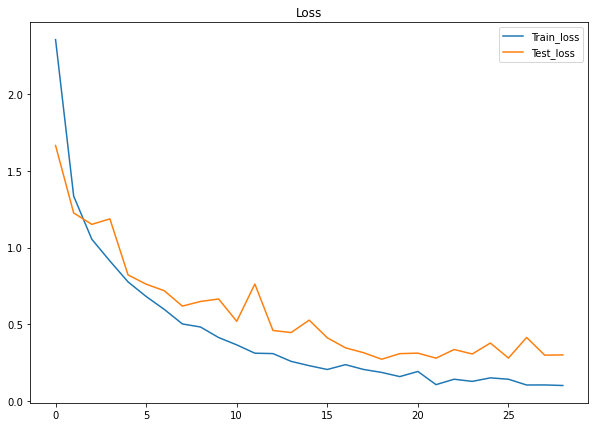

In [14]:
plt.figure(figsize=(10,7))
plt.plot(history.history['loss'], label = 'Train_loss')
plt.plot(history.history['val_loss'], label='Test_loss')
plt.title('Loss')
plt.legend()
plt.show

Train 데이터를 넣었을 때 정확도와 Test 데이터 넣었을 때 정확도 시각화

<function matplotlib.pyplot.show(close=None, block=None)>

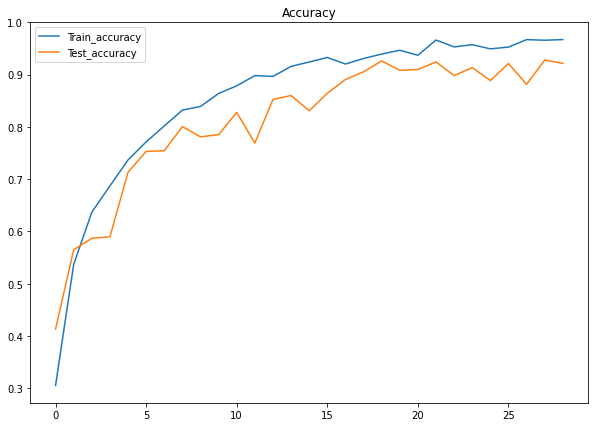

In [15]:
plt.figure(figsize=(10,7))
plt.plot(history.history['accuracy'], label = 'Train_accuracy')
plt.plot(history.history['val_accuracy'], label='Test_accuracy')
plt.title('Accuracy')
plt.legend()
plt.show

포켓몬 사진 입력하면 이 포켓몬이 어떤 포켓몬인지 예측을 한 후 그 포켓몬에 맞는 진화사진을 보여줌

In [16]:
evolution_list = ['Raichu', 'Ivysaur', 'Golduck', 'Clefable', 'Haunter', 'Arcanine', 'Wigglytuff', 'Mewtwo', 'Poliwhirl', 'Slowbro']
final_evolution_list = [np.nan, 'Venusaur', np.nan, np.nan, 'Gengar', np.nan, np.nan, np.nan, 'Poliwrath', np.nan]
df = pd.DataFrame([[0,'Pikachu'], [1,'Bulbasaur'], [2,'Psyduck'], [3,'Clefairy'], [4,'Gastly'], [5,'Growlithe'], [6,'Jigglypuff'], [7,'Mew'], [8,'Poliwag'], [9,'Slowpoke']], 
                    columns=['label', 'Pocketmon'])
df['evolution'] = [evolution_list[0], evolution_list[1], evolution_list[2], evolution_list[3], evolution_list[4], 
                    evolution_list[5], evolution_list[6], evolution_list[7], evolution_list[8], evolution_list[9]]
df['final_evolution'] = [final_evolution_list[0], final_evolution_list[1], final_evolution_list[2], final_evolution_list[3], final_evolution_list[4], final_evolution_list[5],
                            final_evolution_list[6], final_evolution_list[7], final_evolution_list[8], final_evolution_list[9]]
df

,label,Pocketmon,evolution,final_evolution
0,0,Pikachu,Raichu,NaN
1,1,Bulbasaur,Ivysaur,Venusaur
2,2,Psyduck,Golduck,NaN
3,3,Clefairy,Clefable,NaN
4,4,Gastly,Haunter,Gengar
5,5,Growlithe,Arcanine,NaN
6,6,Jigglypuff,Wigglytuff,NaN
7,7,Mew,Mewtwo,NaN
8,8,Poliwag,Poliwhirl,Poliwrath
9,9,Slowpoke,Slowbro,NaN


포켓몬 사진 입력 전처리 후 출력

입력한 사진의 포켓몬: Growlithe, 라벨: 5

-----------입력한 사진 출력-------------


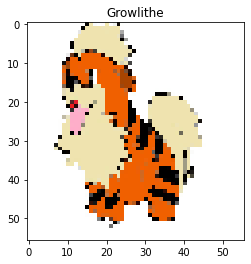

In [64]:
try:
    
    img_path = input('이미지경로를 입력(\\로 구분): ')
    evolution_img = cv2.imread(img_path)
    evolution_img = cv2.resize(evolution_img, dsize=(56, 56))
    evolution_img = cv2.cvtColor(evolution_img, cv2.COLOR_BGR2RGB)

    evolution_poc = img_path.split('\\')
    evolution_poc = evolution_poc[12] 
    evolution_poc = evolution_poc.split('.')
    evolution_poc = str(evolution_poc[0]) 
    evolution_label = dic_label[evolution_poc]
    W1, H1, C1 = evolution_img.shape
    evolution_img = evolution_img.reshape(-1, H1 * W1 * C1)
    evolution_img = evolution_img.astype('float') / 255
    print('입력한 사진의 포켓몬: {}, 라벨: {}'.format(evolution_poc, evolution_label))
    print()
    print('-----------입력한 사진 출력-------------')
    plt.imshow(evolution_img.reshape(56,56,3))
    plt.title(evolution_poc)
except:
    print('잘못된 사진 입력(다시 실행 하세요)')
    pass

사진을 보고 모델이 예측한 포켓몬과 예측환 포켓몬의 진화된 포켓몬 사진을 랜덤으로 보여줌

In [ ]:
image_list_Raichu = os.listdir('C:\\Users\\Master\\Desktop\\upgrade1\\Raichu\\')
image_list_Ivysaur = os.listdir('C:\\Users\\Master\\Desktop\\upgrade1\\Ivysaur\\')
image_list_Golduck = os.listdir('C:\\Users\\Master\\Desktop\\upgrade1\\Golduck\\')
image_list_Clefable = os.listdir('C:\\Users\\Master\\Desktop\\upgrade1\\Clefable\\')
image_list_Haunter = os.listdir('C:\\Users\\Master\\Desktop\\upgrade1\\Haunter\\')
image_list_Arcanine = os.listdir('C:\\Users\\Master\\Desktop\\upgrade1\\Arcanine\\')
image_list_Wigglytuff = os.listdir('C:\\Users\\Master\\Desktop\\upgrade1\\Wigglytuff\\')
image_list_Mewtwo = os.listdir('C:\\Users\\Master\\Desktop\\upgrade1\\Mewtwo\\')
image_list_Poliwhirl = os.listdir('C:\\Users\\Master\\Desktop\\upgrade1\\Poliwhirl\\')
image_list_Slowbro = os.listdir('C:\\Users\\Master\\Desktop\\upgrade1\\Slowbro\\')

모델이 예측한 포켓몬: Growlithe
예측한 포켓몬의 진화: Arcanine
----------- Growlithe이 진화한 Arcanine 랜덤 사진 출력 -------------


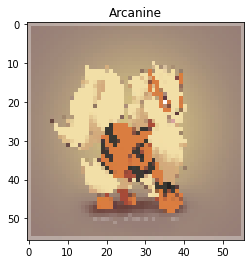

In [66]:
evolution_predict = np.argmax(model_best.predict(evolution_img), axis=1)
evolution_predict = int(evolution_predict)
print('모델이 예측한 포켓몬: {}'.format(dic_title[evolution_predict]))

test = df.loc[evolution_predict]
result = test['evolution']
print('예측한 포켓몬의 진화: {}'.format(test['evolution']))

r = random.randint(1,49)
r = str(r)

result_path = 'C:' + '\\' + 'Users' '\\' + 'Master' + '\\' + 'Desktop' + '\\' + 'upgrade1' + '\\' + result + '\\' + result + '.' + str(r) + '.jpg'

try:
    result_path = 'C:' + '\\' + 'Users' '\\' + 'Master' + '\\' + 'Desktop' + '\\' + 'upgrade1' + '\\' + result + '\\' + result + '.' + str(r) + '.jpg'
    evol_path = cv2.imread(result_path)
    evol_path = cv2.resize(evol_path, dsize=(56, 56))
    evol_path = cv2.cvtColor(evol_path, cv2.COLOR_BGR2RGB)

    W2, H2, C2 = evol_path.shape
    evol_path = evol_path.reshape(-1, H2 * W2 * C2)
    evol_path = evol_path.astype('float') / 255
    print('----------- {}이 진화한 {} 랜덤 사진 출력 -------------'.format(evolution_poc, result))
    plt.imshow(evol_path.reshape(56,56,3))
    plt.title(result)
except:
    print('잘못된 사진 입력')
    pass

Random Forest

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
clf = RandomForestClassifier(n_estimators=100)
clf.fit(train_pics, train_labels)

pred = clf.predict(test_pics)

print("accuracy :", str(accuracy_score(test_labels, pred)))
print(classification_report(test_labels, pred))

accuracy : 0.9697805642633229
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       793
           1       0.96      0.98      0.97       766
           2       0.96      0.95      0.96       813
           3       0.99      0.98      0.98       799
           4       0.97      0.99      0.98       786
           5       0.95      0.97      0.96       803
           6       0.98      0.97      0.98       793
           7       0.96      0.97      0.97       809
           8       0.98      0.96      0.97       819
           9       0.98      0.97      0.98       794

    accuracy                           0.97      7975
   macro avg       0.97      0.97      0.97      7975
weighted avg       0.97      0.97      0.97      7975



KNN

In [68]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(train_pics, train_labels)

k_pred = knn.predict(test_pics)

print("accuracy :", str(accuracy_score(test_labels, k_pred)))
print(classification_report(test_labels, k_pred))


accuracy : 0.8786206896551724
              precision    recall  f1-score   support

           0       0.96      0.73      0.83       793
           1       0.92      0.90      0.91       766
           2       0.79      0.87      0.83       813
           3       0.81      0.92      0.86       799
           4       0.96      0.96      0.96       786
           5       0.93      0.86      0.89       803
           6       0.92      0.89      0.91       793
           7       0.78      0.90      0.84       809
           8       0.94      0.89      0.91       819
           9       0.84      0.87      0.85       794

    accuracy                           0.88      7975
   macro avg       0.89      0.88      0.88      7975
weighted avg       0.88      0.88      0.88      7975



support vector machine

In [20]:
from sklearn.svm import SVC

svm = SVC(kernel = 'rbf', C=1, gamma = 'auto',probability=True)
svm.fit(train_pics, train_labels)

s_pred = svm.predict(test_labels)

print("accuracy :", str(accuracy_score(test_labels, s_pred)))
print(classification_report(test_labels, s_pred))
